In this project we will use linear algebra techniques to proccess an image

Tasks:

    1)Reduce image size

Methods:

    1) SVD


We will use numpy library to use basics of linagl to work with matrices

In [62]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

(1197, 1200, 3)


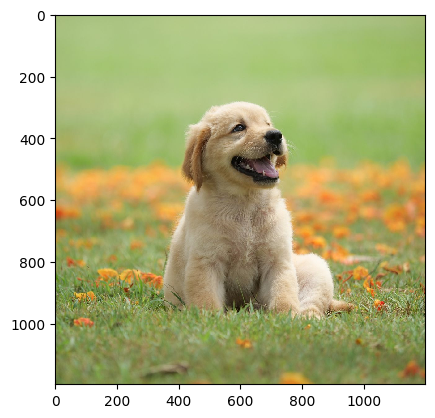

In [71]:
image = Image.open('photo.jpg')
img = np.array(image)

print(img.shape)

plt.imshow(img, interpolation='nearest')
plt.show()

We have 1197x1200 color image

We can do square photo from this one, but we wont.

Let's play with our image, but we should reduce third dimension with RGB channels to make work a bit less confusing

(1197, 1200)


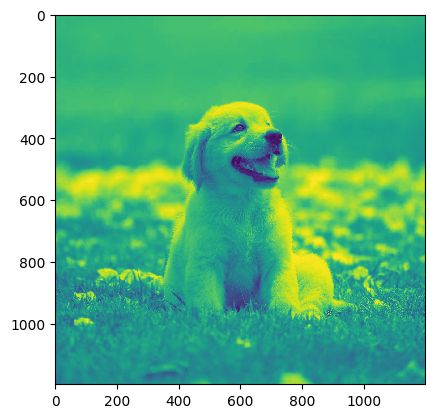

In [85]:
img2d = img[:,:,0]
print(img2.shape)

plt.imshow(img2d, interpolation='nearest')
plt.show()

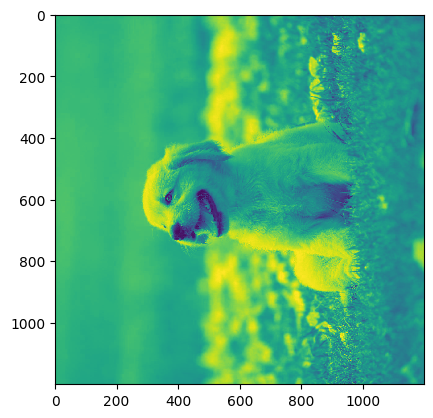

In [86]:
plt.imshow(img2d.T, interpolation='nearest')
plt.show()

Image is a matrix of pixels, and we can do SVD to find biggest principle components ( singular values ) and reduce smallest one, if we had MxM matrix we would use ordinary value decomposition

In [123]:
print(img2d[:1])

[[166 166 166 ... 161 161 161]]


In [131]:
lsv, sv, rsv = np.linalg.svd(img2d)

In [132]:
sv_diag = np.diag(sv)
min_dim = min(img2d.shape)
sv_matrix = np.zeros_like(img2d, dtype=float)
np.fill_diagonal(sv_matrix, sv)

print(lsv.shape, sv_matrix.shape, rsv.shape)

(1197, 1197) (1197, 1200) (1200, 1200)
[[195944.61596648      0.              0.         ...      0.
       0.              0.        ]
 [     0.          19427.88389485      0.         ...      0.
       0.              0.        ]
 [     0.              0.          13626.42517916 ...      0.
       0.              0.        ]
 ...
 [     0.              0.              0.         ...      0.
       0.              0.        ]
 [     0.              0.              0.         ...      0.
       0.              0.        ]
 [     0.              0.              0.         ...      0.
       0.              0.        ]]


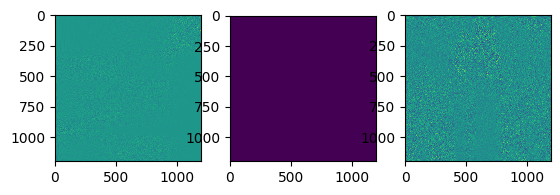

In [133]:
fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].imshow(lsv, interpolation='nearest')
ax[1].imshow(sv_matrix, interpolation='nearest')
ax[2].imshow(rsv, interpolation='nearest')
plt.show()

Here we have left singular vectors, singular values matrix and right singular vectors



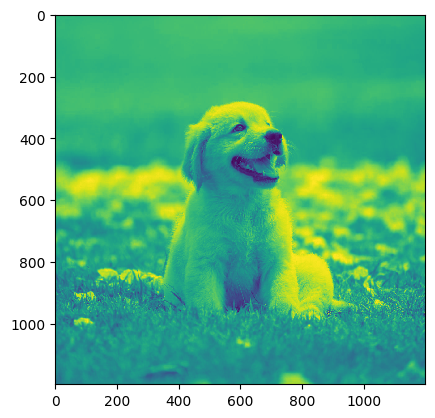

(1197, 1200)


In [140]:
image_matrix = lsv@sv_matrix@rsv

plt.imshow(image_matrix, interpolation='nearest')
plt.show()

print(image_matrix.shape)

Now we have vectors and values, and we constructed the new(SAME) image from our SVD of image, let's now reduce dimensionals, to do so we should reduce small singular values

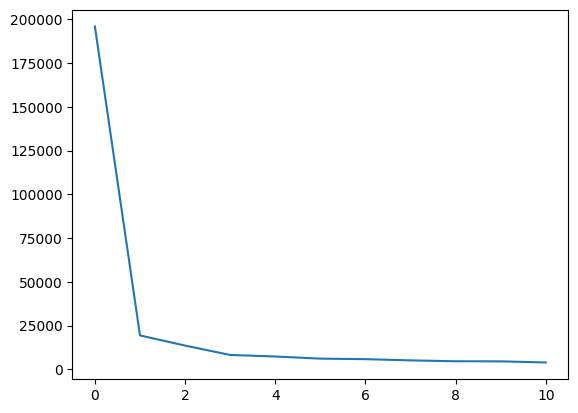

In [153]:
lenght = int(len(sv)/100)
components = list(range(0, lenght))

plt.plot(components, sv[:lenght])
plt.show()

Let's try with 3 singular values

In [194]:
sv_count = 3

lsv_reduced = lsv[:, :sv_count]
sv_reduced = np.diag(sv[:sv_count])
rsv_reduced = rsv[:sv_count, :]

print(lsv_reduced.shape, sv_reduced.shape, rsv_reduced.shape)

(1197, 3) (3, 3) (3, 1200)


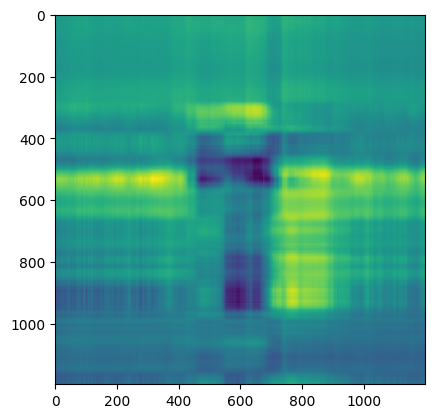

In [195]:
img2d_reduced = lsv_reduced @ sv_reduced @ rsv_reduced

plt.imshow(img2d_reduced, interpolation='nearest')
plt.show()

Let's try with 30 singular values

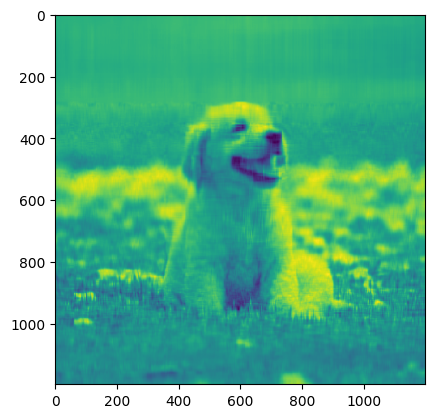

In [196]:
sv_count = 30

lsv_reduced = lsv[:, :sv_count]
sv_reduced = np.diag(sv[:sv_count])
rsv_reduced = rsv[:sv_count, :]

img2d_reduced = lsv_reduced @ sv_reduced @ rsv_reduced

plt.imshow(img2d_reduced, interpolation='nearest')
plt.show()

More singular values we have - more information we have, let's see with 150 singular values

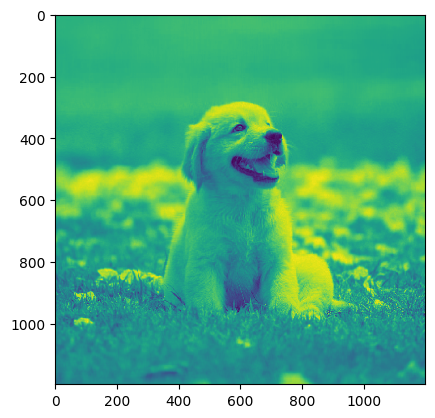

In [207]:
sv_count = 150

lsv_reduced = lsv[:, :sv_count]
sv_reduced = np.diag(sv[:sv_count])
rsv_reduced = rsv[:sv_count, :]

img2d_reduced = lsv_reduced @ sv_reduced @ rsv_reduced

plt.imshow(img2d_reduced, interpolation='nearest')
plt.show()

Looks like original image but reduced 8 times. 

Compare with the original:

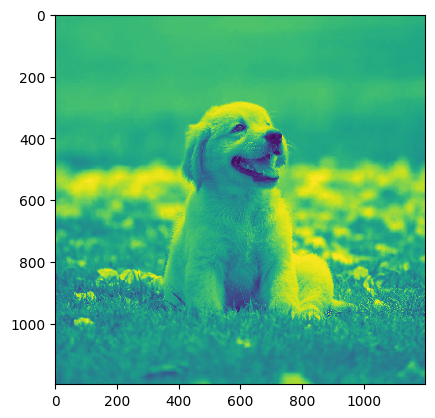

In [198]:
sv_count = 1197

lsv_reduced = lsv[:, :sv_count]
sv_reduced = np.diag(sv[:sv_count])
rsv_reduced = rsv[:sv_count, :]

img2d_reduced = lsv_reduced@sv_reduced@rsv_reduced
plt.imshow(img2d_reduced, interpolation='nearest')
plt.show()

Reducing 8 times with original it looks same, and the difference in sizes we have, when we compare image as SVD:

In [218]:
# Original value
sv_count_original = 1197

lsv_bytes = lsv[:, :sv_count_original].nbytes
sv_bytes = np.diag(sv[:sv_count_original]).nbytes
rsv_bytes = rsv[:sv_count_original, :].nbytes

bytes_original = lsv_bytes + sv_bytes + rsv_bytes
print("bytes_original = ", bytes_original)

# Reduced value
sv_reduced_count = 150

lsv_reduced_bytes = lsv[:, :sv_count].nbytes
sv_reduced_bytes = np.diag(sv[:sv_count]).nbytes
rsv_reduced_bytes = rsv[:sv_count, :].nbytes

bytes_reduced = lsv_reduced_bytes + sv_reduced_bytes + rsv_reduced_bytes
print("bytes_reduced = ", bytes_reduced)

print(f'bytes_original is bigger than bytes_reduced {bytes_original/bytes_reduced} times')

bytes_original =  34416144
bytes_reduced =  3056400
bytes_original is bigger than bytes_reduced 11.260353356890459 times


Huge result we've achived, lets save our photo

In [230]:
sv_count = 150

lsv_reduced = lsv[:, :sv_count]
sv_reduced = np.diag(sv[:sv_count])
rsv_reduced = rsv[:sv_count, :]

img2d_reduced = lsv_reduced @ sv_reduced @ rsv_reduced

image_data = np.uint8(img2d_reduced)

image = Image.fromarray(image_data) 
image.save('photo_reduced.jpg')

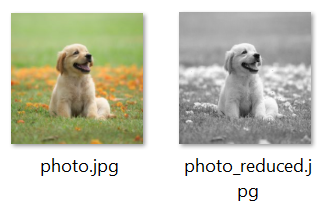

Quite good result, we have achieved 11 times size reduction, with resprect that the original photo had been compressed already, and it was colored.